In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import seaborn as sns
import h5py   
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import find_peaks
from scipy.stats import chisquare

In [3]:
a=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/text files with values/Laser_scans_MPW2/*")
a= sorted(a)



In [3]:
from random import randint
colors = []

for i in range(64):
    colors.append('#%06X' % randint(0, 0xFFFFFF))



'/home/pixel/Documents/Master_Thesis_Douwe_Nobels/text files with values/Laser_scans_MPW2/lasScan_P2_4V_A1_8V_B100V_W10ns_tot'

In [4]:
data=np.genfromtxt(a[0],delimiter='\t',dtype=str,autostrip=True)

In [84]:
data1=np.genfromtxt(a[0],delimiter='\t',dtype=str,autostrip=True)

data11=[]

for i in range(len(data1)):
    temp=[]
    tempdata= data1[i][1:-1].split()
    tempdata= np.char.strip(tempdata)
    for j in range(len(tempdata)):
        tempdata[j]=tempdata[j].replace(",","")
    for k in range(len(tempdata)):
        temp.append(float(tempdata[k]))
    data11.append(temp)

In [85]:
tot2=[]
for i in range(len(data11)):
    mean= np.mean(data11[i])
    tot2.append(mean)

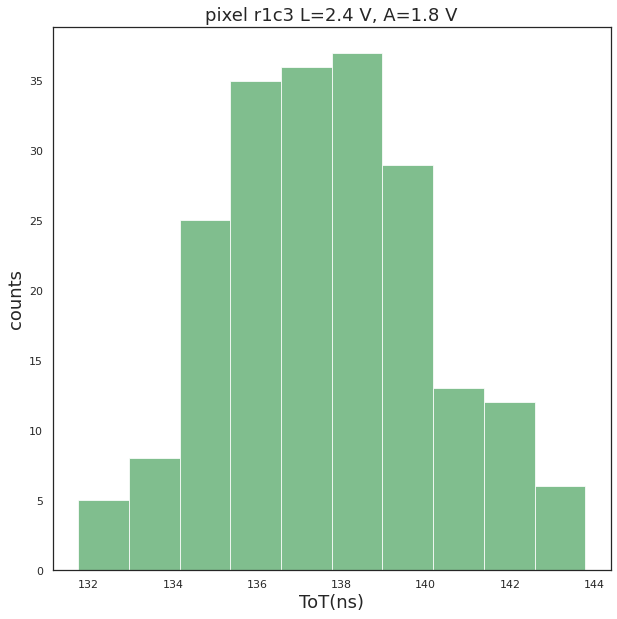

In [86]:
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(np.asarray(data11[1])*10**9, 10,facecolor='g', alpha=0.75)
plt.xlabel("ToT(ns)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("pixel r1c3 L=2.4 V, A=1.8 V",fontsize=18)
fig.patch.set_facecolor('xkcd:white')





plt.show()

In [11]:
totmap= np.reshape(tot2,(8,8))

print(totmap[:,0:4])

[[1.19544446e-07 1.37636793e-07 1.21914042e-07 2.06601188e-07]
 [2.20051608e-07 2.26504556e-07 2.28626800e-07 2.94744546e-07]
 [2.56656463e-07 2.51795635e-07 4.14573236e-07 2.94458115e-07]
 [3.17681599e-07 3.71257532e-07 3.72714215e-07 3.14564746e-07]
 [2.95247761e-07 2.28430836e-07 3.48553598e-07 1.66081614e-07]
 [3.12930986e-07 2.79931969e-07 2.97753127e-07 2.89347770e-07]
 [1.81208701e-07 2.60702603e-07 3.64063661e-07 2.70964411e-07]
 [2.62638360e-07 2.21981020e-07 2.36095982e-07 2.93643703e-07]]


In [60]:
zzz=np.arange(0,64,1)

In [63]:
zzz[11]

11

<Figure size 720x720 with 0 Axes>

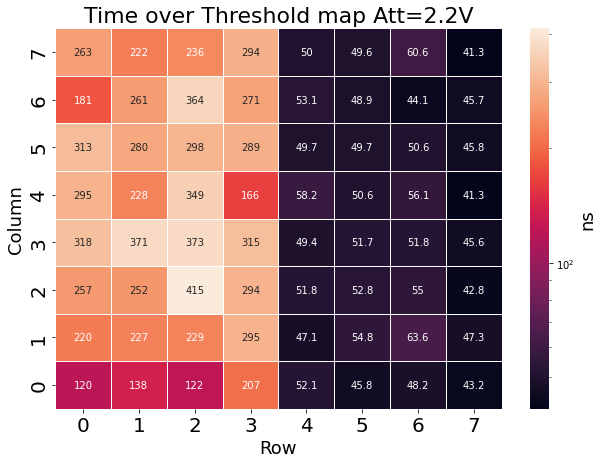

In [12]:
fig = plt.figure(figsize=(10,10))

plt.figure(figsize = (10,7))
plt.title('Time over Threshold map Att=2.2V',fontsize=22)
ax=sns.heatmap(totmap*10**9, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

In [9]:
alldata=[]

for z in range(len(a)):
    data11=[]
    data=np.genfromtxt(a[z],delimiter='\t',dtype=str,autostrip=True)
    for i in range(len(data)):
        temp=[]
        tempdata= data[i][1:-1].split()
        tempdata= np.char.strip(tempdata)
        for j in range(len(tempdata)):
            tempdata[j]=tempdata[j].replace(",","")
        for k in range(len(tempdata)):
            temp.append(float(tempdata[k]))
        data11.append(temp)
    alldata.append(data11)

In [10]:
alltot=[]
allstd=[]
for i in range(len(alldata)):
    temp=[]
    temp1=[]
    for j in range(len(alldata[i])):
        temp1.append(np.mean(alldata[i][j]))
        temp.append(np.std(alldata[i][j]))
    alltot.append(temp1)
    allstd.append(temp)

In [11]:
v=np.array([0.43,0.59,0.79,0.99,1.19,1.39,1.59,1.79])

pixels=[]
pixelstd=[]
for i in range(len(alldata[0])):
    temp=[]
    temp2=[]
    for j in range(len(alltot)):
        temp.append(alltot[j][i])
        temp2.append(allstd[j][i])
    pixels.append(temp)
    pixelstd.append(temp2)
    temp2=[]
    temp=[]


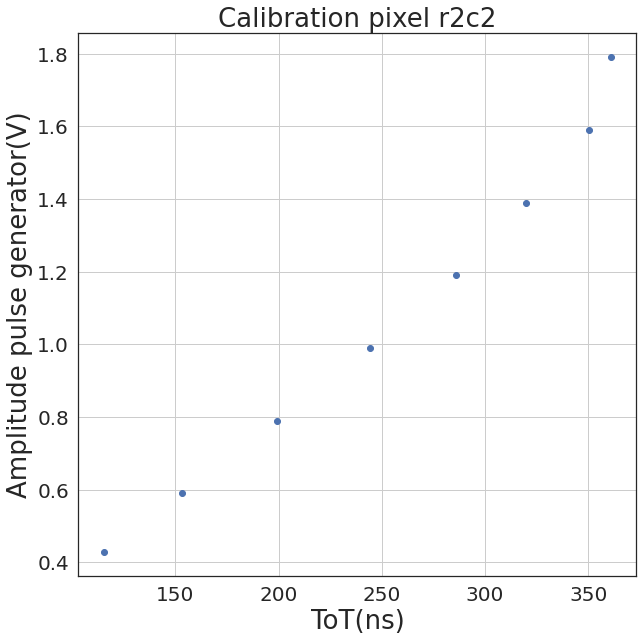

In [12]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.asarray(pixels[9])*10**9,v)
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Amplitude pulse generator(V)",fontsize=26)
plt.title("Calibration pixel r2c2",fontsize=26)
plt.xlabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [13]:
v=np.array([0.43,0.59,0.79,0.99,1.19,1.39,1.59,1.79])

electrons=[]
c=6.24*10**18
cont=(2.8*10**-15)*c
for i in range(len(v)):
    d=v[i]*cont
    electrons.append(d)
    
    
print(electrons)

[7512.96, 10308.48, 13802.880000000001, 17297.28, 20791.68, 24286.079999999998, 27780.480000000003, 31274.88]


In [14]:
pl=[225,280,323,375]
chaa=[]
for i in range(len(pl)):
    chaa.append((pl[i]+7.083)/0.0161)
    
print(chaa)

[14415.093167701863, 17831.242236024846, 20502.049689440995, 23731.86335403727]


In [15]:
yerr=[]
for i in range(len(allstd[0])):
    temp=[]
    for j in range(len(allstd)):
        temp.append(allstd[j][i])
    yerr.append(temp)
    temp=[]

In [16]:
ms=[]
bs=[]
for i in range(len(pixels)):
    m,b = np.polyfit(electrons[0:5],pixels[i][0:5],1)
    ms.append(m)
    bs.append(b)

electrons= np.asarray(electrons)

print(electrons)

[ 7512.96 10308.48 13802.88 17297.28 20791.68 24286.08 27780.48 31274.88]


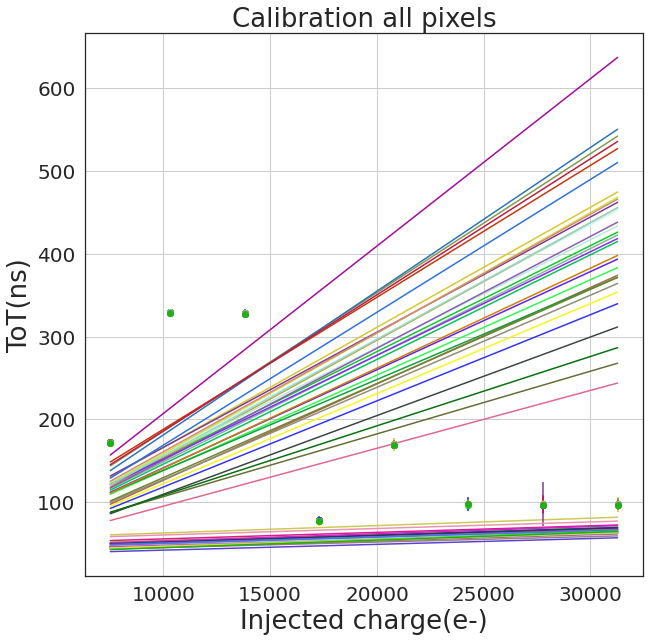

In [32]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms)):
    plt.plot(electrons, (electrons*ms[i]+bs[i])*10**9,color=colors[i])
    plt.errorbar(electrons,np.asarray(pixels[i])*10**9, yerr= np.asarray(yerr[i])*10**9,fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration all pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [31]:
chi2=[]
pval=[]

for i in range(len(ms)):
    electrons*ms[i]+bs[i]
    


In [19]:
mmap= np.reshape(ms,(8,8))


<Figure size 720x720 with 0 Axes>

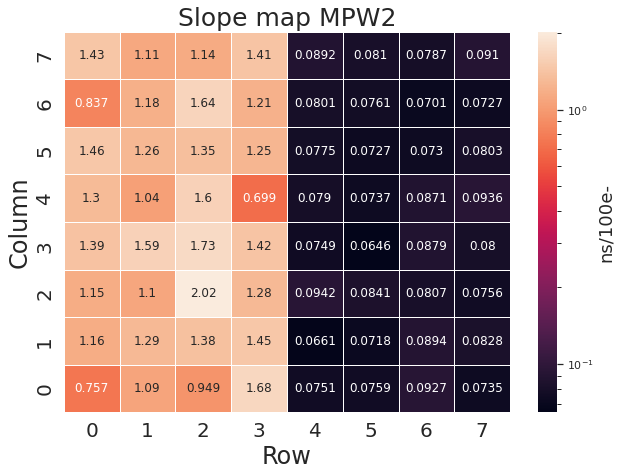

In [20]:
fig = plt.figure(figsize=(10,10))

plt.figure(figsize = (10,7))
plt.title('Slope map MPW2',fontsize=25)
ax=sns.heatmap((mmap*10**9)*100, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns/100e-",fontsize=18)
plt.xlabel("Row",fontsize=24)
plt.ylabel('Column',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

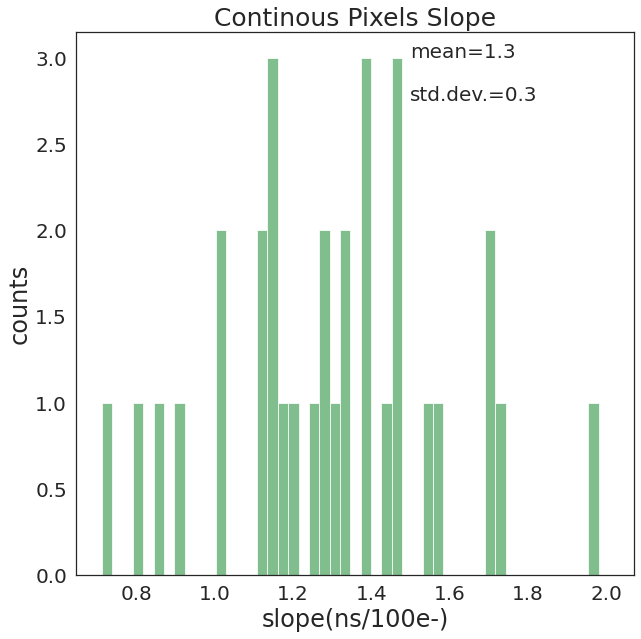

In [21]:
con=(mmap[0:8,0:4])*10**9*100


mean= np.mean(con)
std= np.std(con)
amount= len(con)
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(con, 10,facecolor='g', alpha=0.75)
plt.xlabel("slope(ns/100e-)",fontsize=24)
plt.ylabel("counts",fontsize=24)

plt.title("Continous Pixels Slope",fontsize=25)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(1.5,3),fontsize=20)
plt.annotate("std.dev.={:.1f}".format(std),xy=(1.5,2.75),fontsize=20)
plt.annotate("number of entries {}".format(amount),xy=(1250,20),fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)




plt.show()

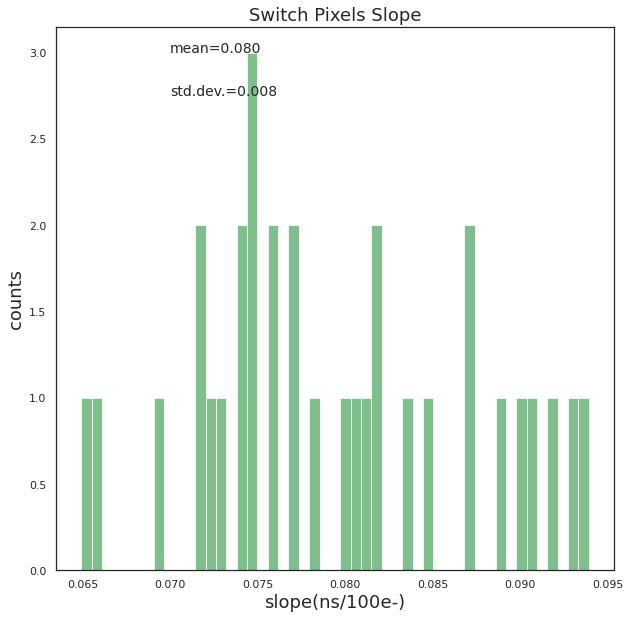

In [22]:
res=(mmap[0:8,4:8])*10**9*100


mean= np.mean(res)
std= np.std(res)
amount= len(res)
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(res, 10,facecolor='g', alpha=0.75)
plt.xlabel("slope(ns/100e-)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Switch Pixels Slope",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.3f}".format(mean),xy=(0.07,3),fontsize=14)
plt.annotate("std.dev.={:.3f}".format(std),xy=(0.07,2.75),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(1250,20),fontsize=14)





plt.show()

In [23]:
a=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/cal_text_mpw2/dt/*")
a= sorted(a)



In [24]:
alldata=[]

for z in range(len(a)):
    data11=[]
    data=np.genfromtxt(a[z],delimiter='\t',dtype=str,autostrip=True)
    for i in range(len(data)):
        temp=[]
        tempdata= data[i][1:-1].split()
        tempdata= np.char.strip(tempdata)
        for j in range(len(tempdata)):
            tempdata[j]=tempdata[j].replace(",","")
        for k in range(len(tempdata)):
            temp.append(float(tempdata[k]))
        data11.append(temp)
    alldata.append(data11)

In [25]:
alltot=[]
allstd=[]
for i in range(len(alldata)):
    temp=[]
    temp1=[]
    for j in range(len(alldata[i])):
        temp1.append(np.mean(alldata[i][j]))
        temp.append(np.std(alldata[i][j]))
    alltot.append(temp1)
    allstd.append(temp)

In [26]:
v=np.array([0.43,0.59,0.79,0.99,1.19,1.39,1.59,1.79])

pixels=[]
pixelstd=[]
for i in range(len(alldata[0])):
    temp=[]
    temp2=[]
    for j in range(len(alltot)):
        temp.append(alltot[j][i])
        temp2.append(allstd[j][i])
    pixels.append(temp)
    pixelstd.append(temp2)
    temp2=[]
    temp=[]


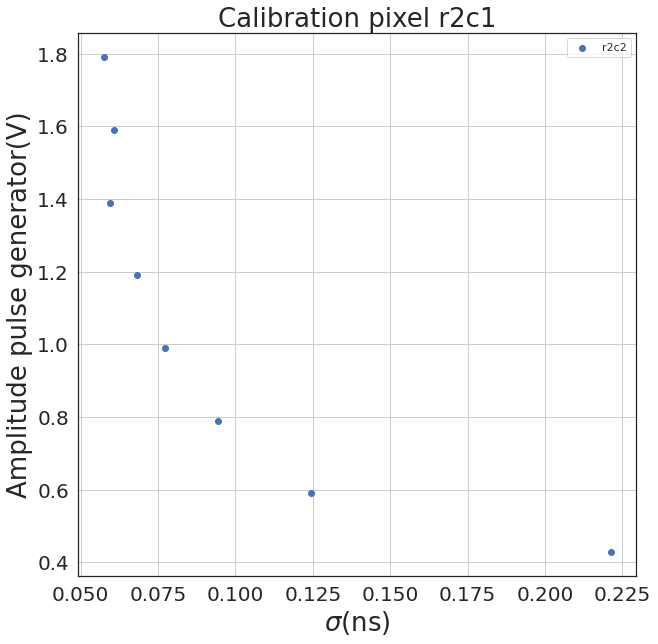

In [27]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.asarray(pixelstd[2])*10**9,v, label="r2c2")
plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Amplitude pulse generator(V)",fontsize=26)
plt.title("Calibration pixel r2c1",fontsize=26)
plt.xlabel("$\sigma$(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

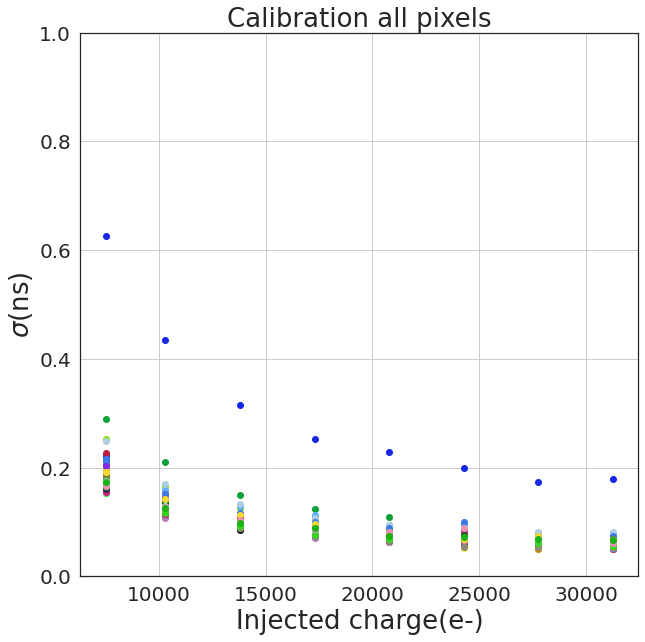

In [28]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms)):
    plt.scatter(electrons,np.asarray(pixelstd[i])*10**9, color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration all pixels",fontsize=26)
plt.ylabel("$\sigma$(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.ylim([0, 1])
plt.show()

In [29]:
temp=[]
for i in range(64):
    temp.append((pixelstd[i][4])*10**9)
    
np.mean(temp)



0.07676975827138219

In [30]:
mmap= np.reshape(lvl,(8,8))

fig = plt.figure(figsize=(10,10))

plt.figure(figsize = (10,7))
plt.title('Slope map MPW2',fontsize=25)
ax=sns.heatmap((mmap*10**9)*100, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns/100e-",fontsize=18)
plt.xlabel("Row",fontsize=24)
plt.ylabel('Column',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

NameError: name 'lvl' is not defined

In [ ]:
lvl=[]
for i in range(64):
    lvl.append(pixelstd[i][0])
